In [81]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr, spearmanr
from tqdm import tqdm
import numpy as np 
import math
import seaborn as sns
from scipy.stats import ttest_ind


demos = ['women', 'black', 'hispanic', 'native american']
%matplotlib inline

In [82]:
trends = pd.read_csv('../../out/trends.csv', index_col=0)

unis = pd.read_csv('../../data/IPEDS/university_info/hd2021.csv', encoding='latin-1', index_col=0)

unis_stats = pd.merge(unis, trends, left_index=True, right_index=True)

In [97]:
unis_stats['ACT'].value_counts()

A     1851
M        1
Name: ACT, dtype: int64

In [70]:
se = unis_stats[unis_stats['OBEREG'] == 5]

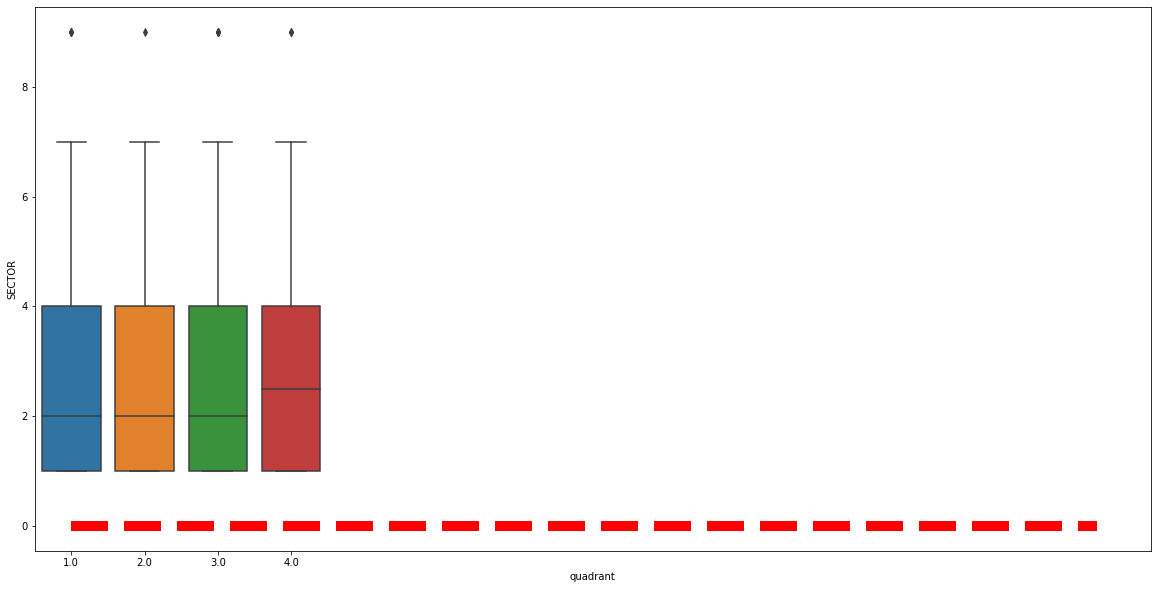

In [85]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='quadrant', y='SECTOR', data=unis_stats)#, order=unis_stats.groupby('STABBR').mean().sort_values('cs_stat', ascending=False).index)
plt.plot(range(15), [0]*15, 'r--', linewidth=10);

/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

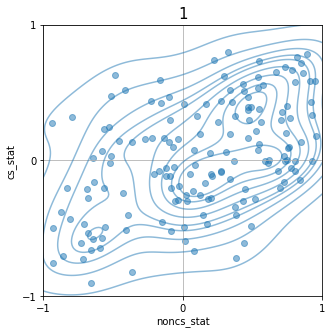

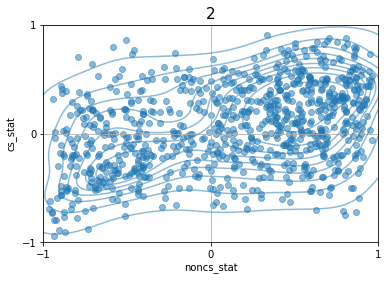

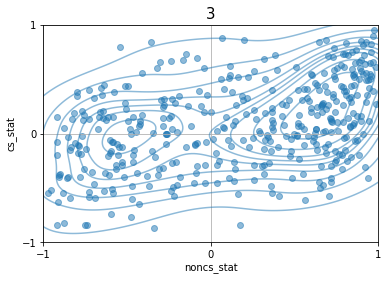

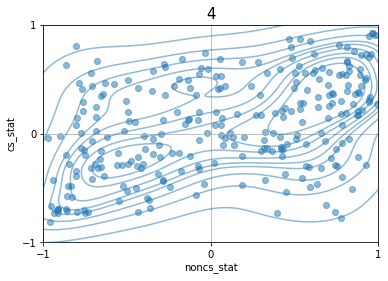

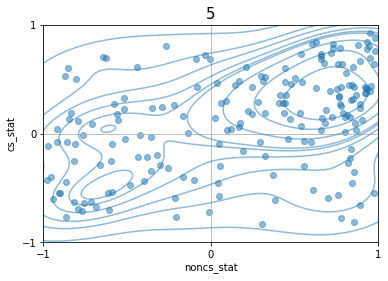

<Figure size 432x288 with 0 Axes>

In [96]:


se = unis_stats[unis_stats['OBEREG'] == 5]

df =  unis_stats # se

plt.figure(figsize=(5, 5))
# unis_stats['OBEREG'] = unis_stats['OBEREG'].replace({1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains', 8: 'Far West', 9: 'Outlying Areas'})

col = 'INSTSIZE'
for reg in sorted(df[col].unique()):
    plt.scatter(df[df[col]==reg]['noncs_stat'], \
                df[df[col]==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    sns.kdeplot(df[df[col]==reg]['noncs_stat'], \
                df[df[col]==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    plt.title(reg, fontsize=15)
    plt.xticks([-1, 0, 1]);
    plt.yticks([-1, 0, 1]);
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid()
    plt.figure()
# sns.scatterplot(data=unis_stats, x='cs_stat', y='noncs_stat', hue='OBEREG', alpha=0.9);

/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

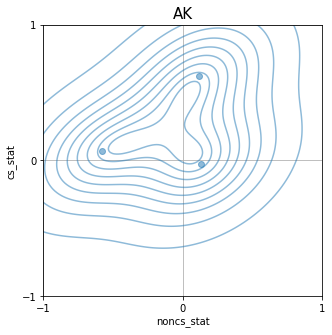

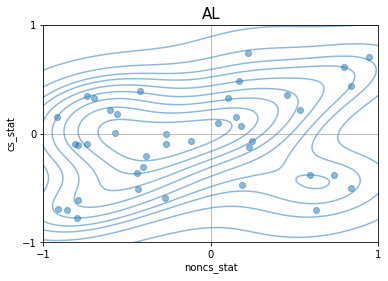

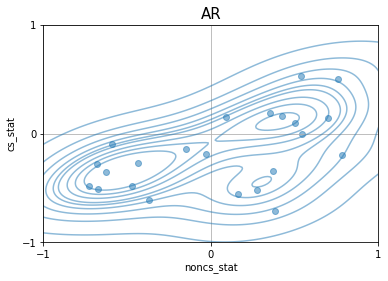

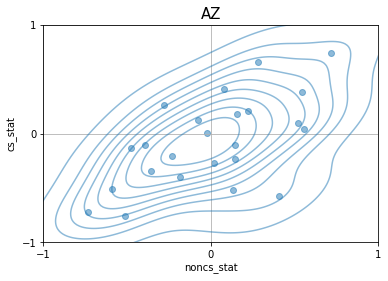

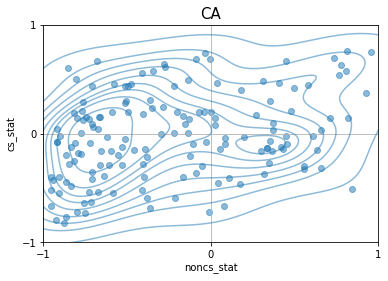

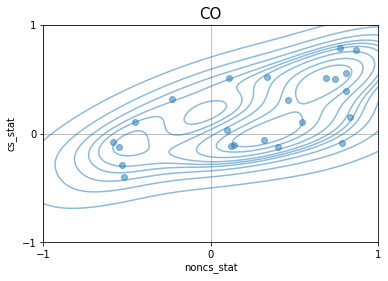

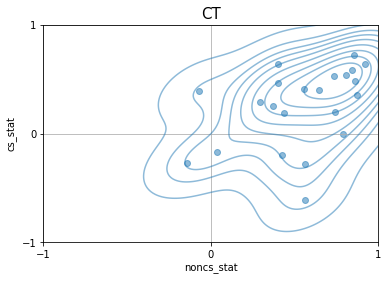

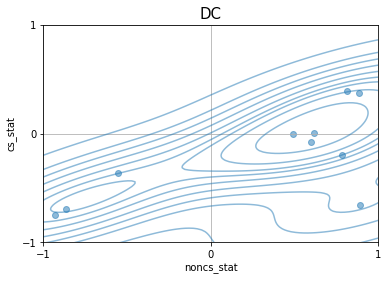

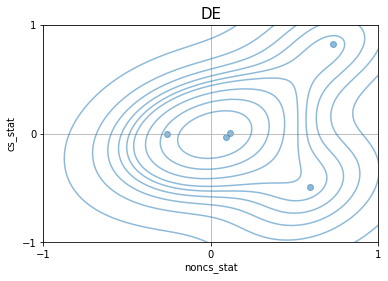

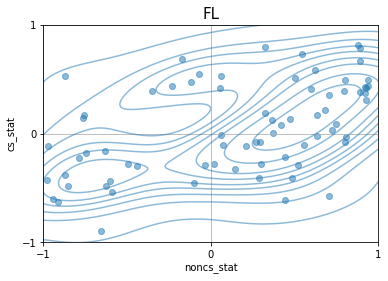

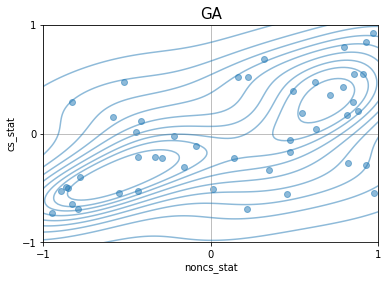

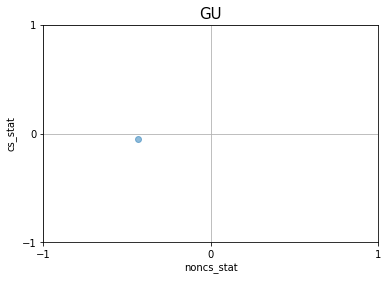

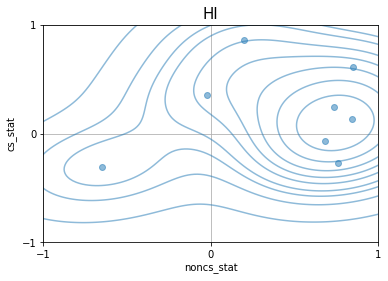

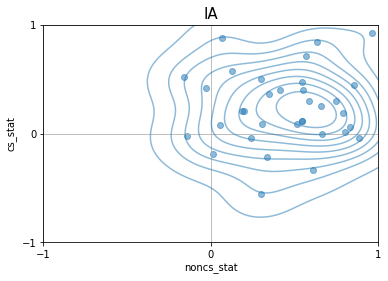

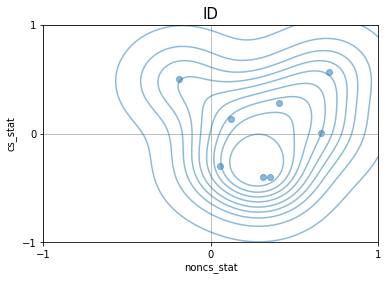

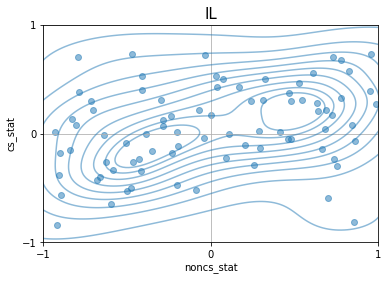

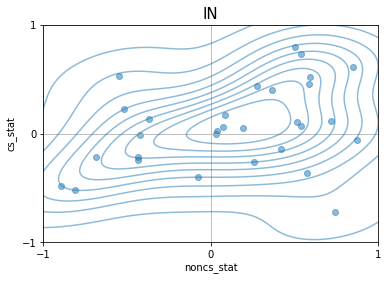

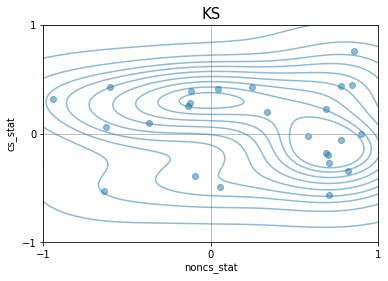

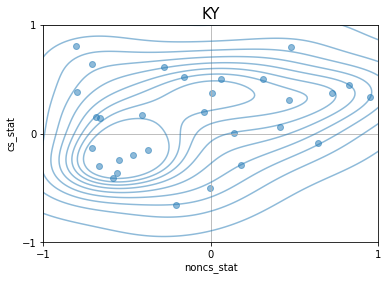

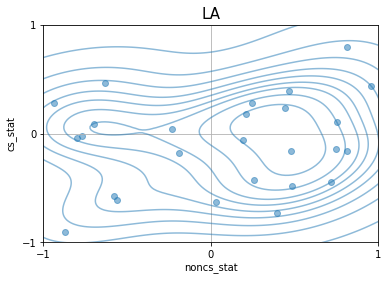

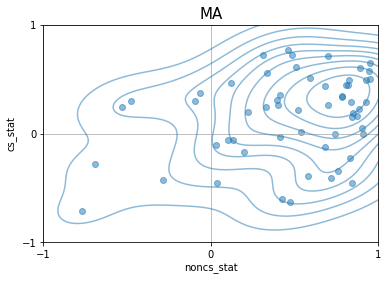

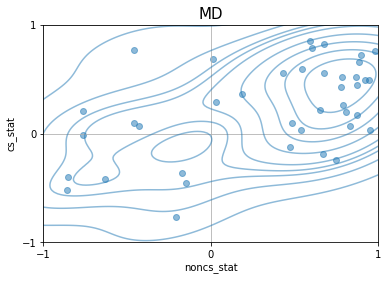

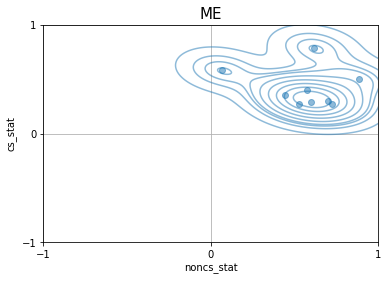

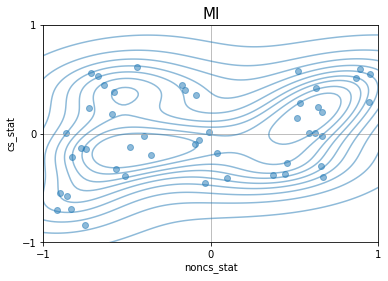

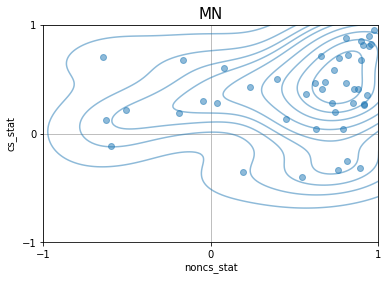

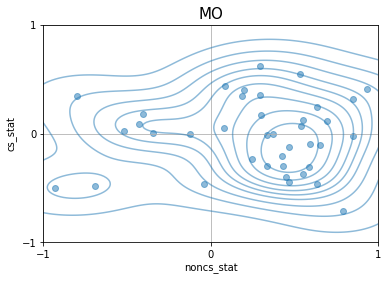

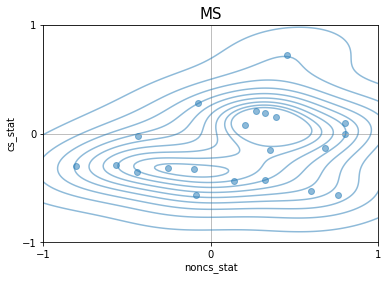

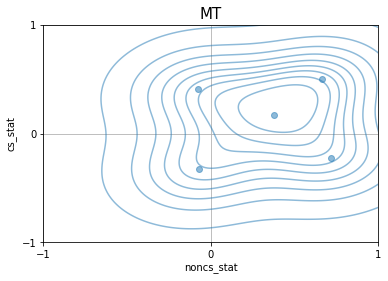

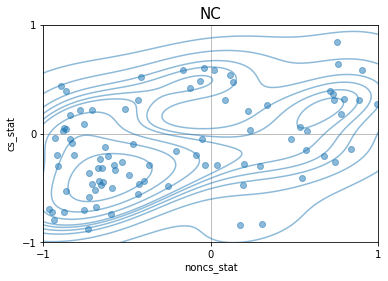

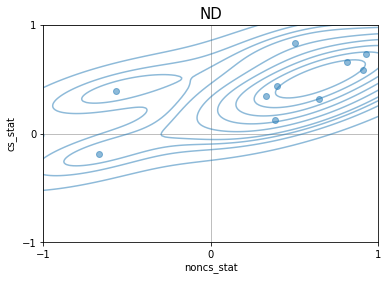

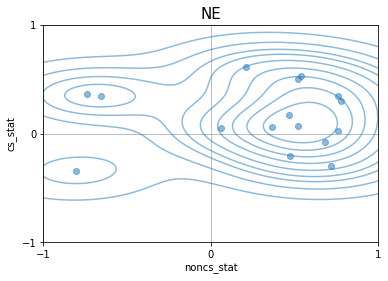

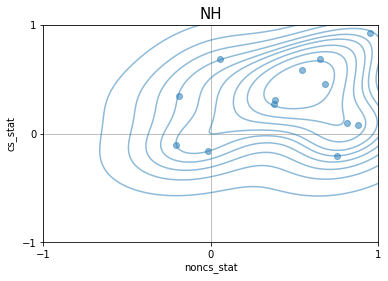

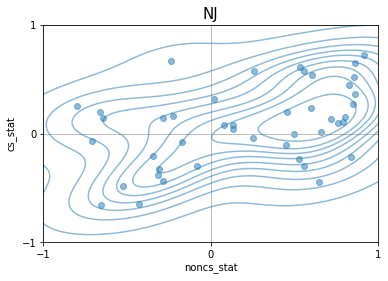

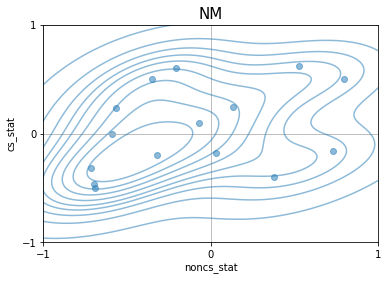

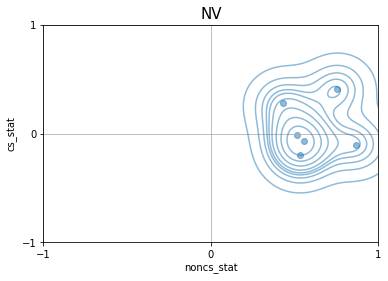

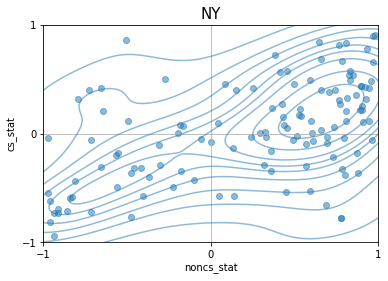

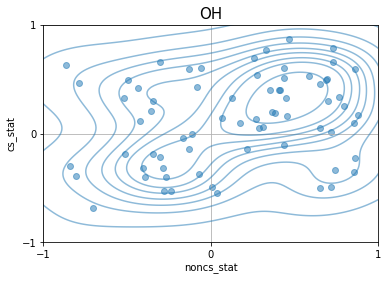

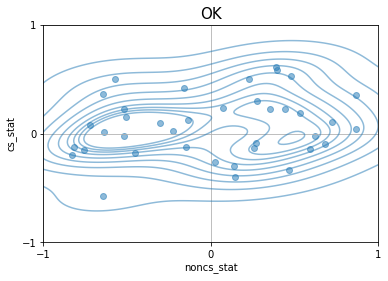

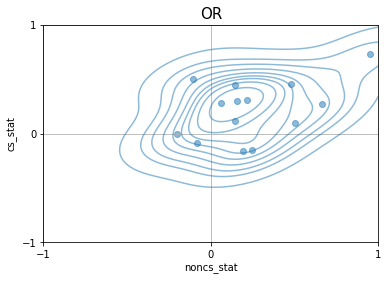

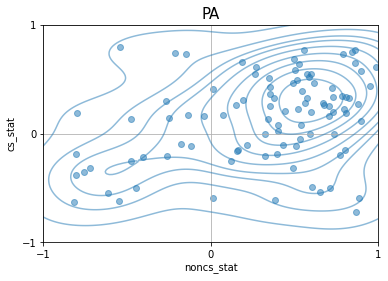

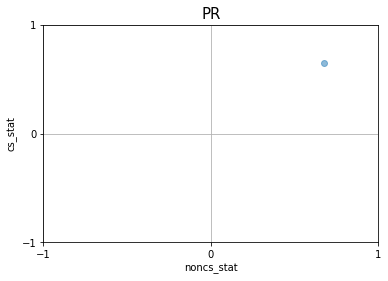

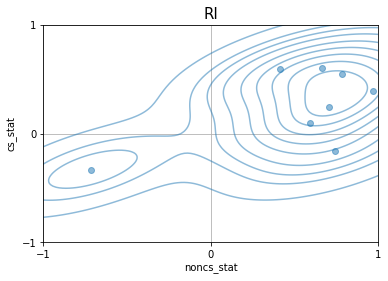

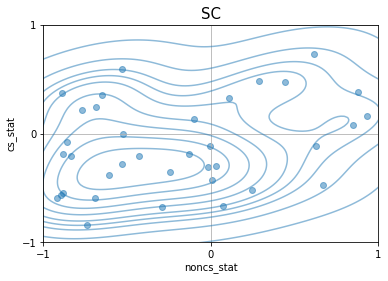

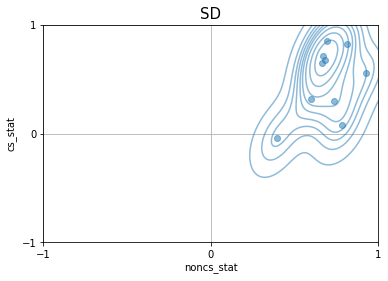

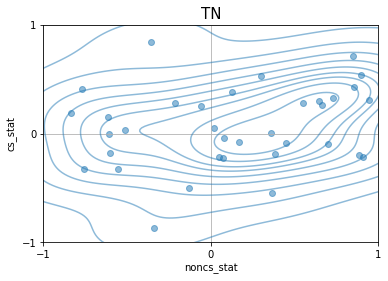

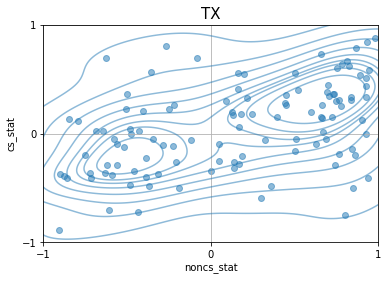

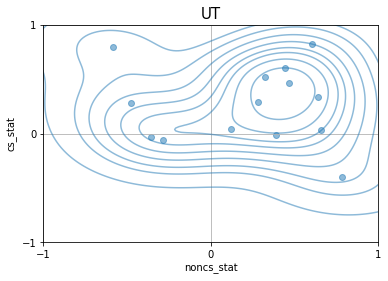

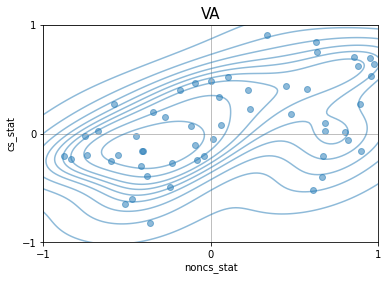

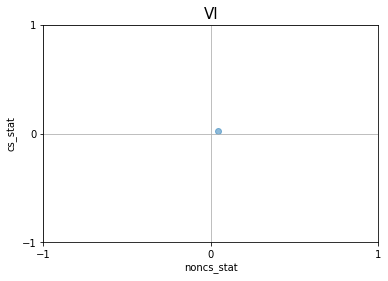

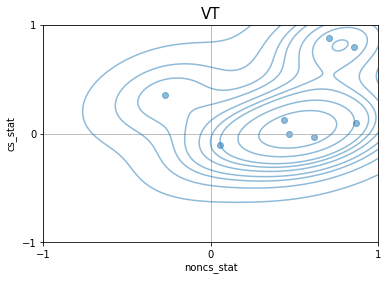

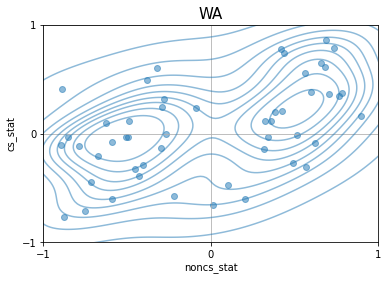

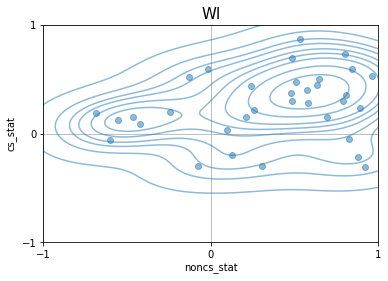

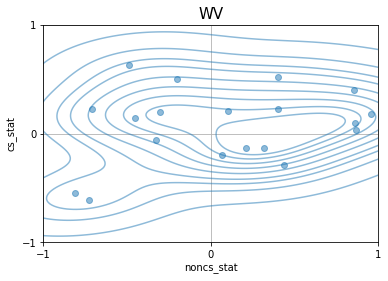

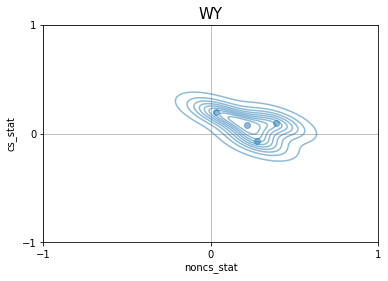

<Figure size 432x288 with 0 Axes>

In [95]:
se = unis_stats[unis_stats['OBEREG'] == 5]

df =  unis_stats # se

plt.figure(figsize=(5, 5))
# unis_stats['OBEREG'] = unis_stats['OBEREG'].replace({1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains', 8: 'Far West', 9: 'Outlying Areas'})

col = 'STABBR'
for reg in sorted(df[col].unique()):
    plt.scatter(df[df[col]==reg]['noncs_stat'], \
                df[df[col]==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    sns.kdeplot(df[df[col]==reg]['noncs_stat'], \
                df[df[col]==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    plt.title(reg, fontsize=15)
    plt.xticks([-1, 0, 1]);
    plt.yticks([-1, 0, 1]);
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid()
    plt.figure()
# sns.scatterplot(data=unis_stats, x='cs_stat', y='noncs_stat', hue='OBEREG', alpha=0.9);